# Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pour éviter les warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_excel(r"D:\Florian\Data Science\Machine Learning\Python ML, Machine Learnia\Files\dataset.xlsx")
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = data.copy()

#### Création des sous ensembles

In [4]:
missing_rate = df.isna().sum() / df.shape[0]
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

In [5]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [6]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [7]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


### TrainTest / Nettoyage / Encodage

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0)

In [10]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [11]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

#### Encodage

Variables qualitatives

In [12]:
for col in df.select_dtypes('object'):
    print(f'{col :-<30}{df[col].unique()}')

SARS-Cov-2 exam result--------['negative' 'positive']
Respiratory Syncytial Virus---[nan 'not_detected' 'detected']
Influenza A-------------------[nan 'not_detected' 'detected']
Influenza B-------------------[nan 'not_detected' 'detected']
Parainfluenza 1---------------[nan 'not_detected' 'detected']
CoronavirusNL63---------------[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus--------[nan 'detected' 'not_detected']
Coronavirus HKU1--------------[nan 'not_detected' 'detected']
Parainfluenza 3---------------[nan 'not_detected' 'detected']
Chlamydophila pneumoniae------[nan 'not_detected' 'detected']
Adenovirus--------------------[nan 'not_detected' 'detected']
Parainfluenza 4---------------[nan 'not_detected' 'detected']
Coronavirus229E---------------[nan 'not_detected' 'detected']
CoronavirusOC43---------------[nan 'not_detected' 'detected']
Inf A H1N1 2009---------------[nan 'not_detected' 'detected']
Bordetella pertussis----------[nan 'not_detected' 'detected']
Metapneumovirus-

In [13]:
# pour encoder les colonnes du dataframe

def encodage(df):
    code = {'positive' : 1,
            'negative' : 0,
            'detected' : 1,
            'not_detected' : 0}
    
    for col in df.select_dtypes('object'):
        df.loc[:, col] = df[col].map(code)
    
    return df

In [14]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis = 1) >= 1
    df = df.drop(viral_columns, axis = 1)
    return (df)

In [15]:
# pour supprimer les valeurs manquantes

def imputation(df):
    # df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    # df = df.fillna(-999) # remplacer les données manquantes par une valeur extreme
    df = df.dropna(axis = 0)
    return df

In [16]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)

    X = df.drop('SARS-Cov-2 exam result', axis = 1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [17]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [18]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


# Procédure d'évaluation

In [19]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

# confusion matrix pour voir les rapports entre faux positifs et faux négatifs

In [20]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv = 4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val score')
    plt.legend()

# Modelisation

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [22]:
# utiliser un test ANOVA pour sélectionner les 10 meilleures variables ayant les liens les plus forts
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False), SelectKBest(f_classif, k = 10))

In [23]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state = 0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state = 0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state = 0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [24]:
list_of_models = {'RandomForest' : RandomForest, 
                  'AdaBoost' : AdaBoost, 
                  'SVM' : SVM, 
                  'KNN' : KNN
                 }

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

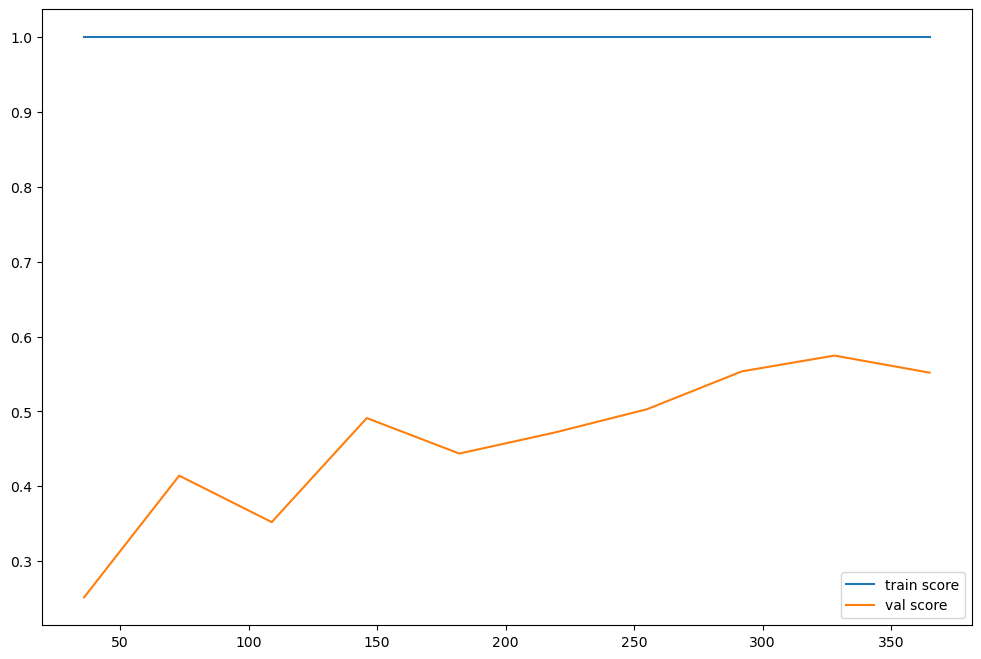

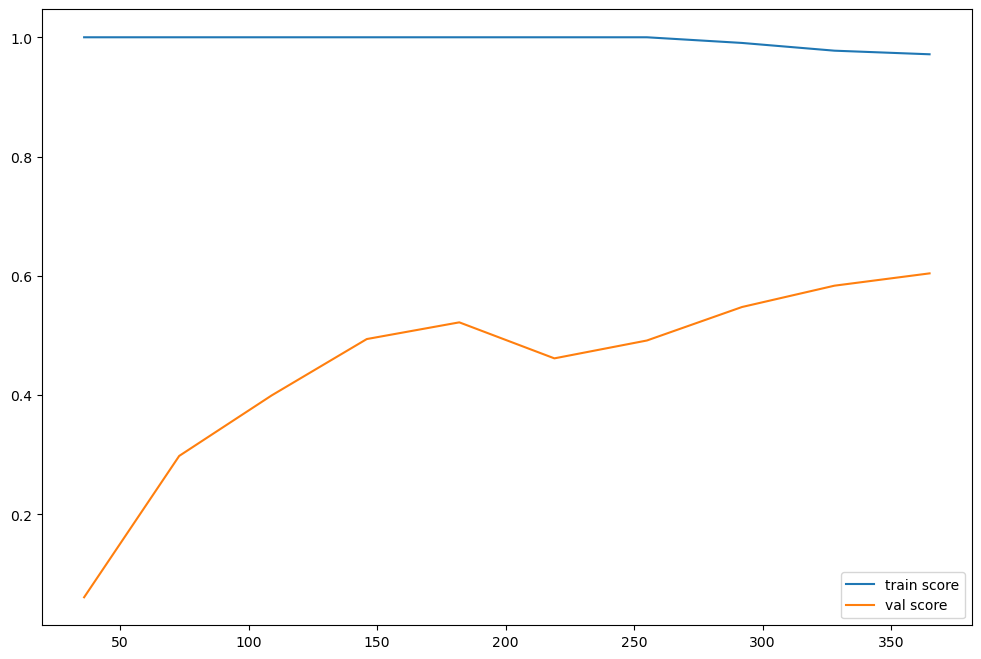

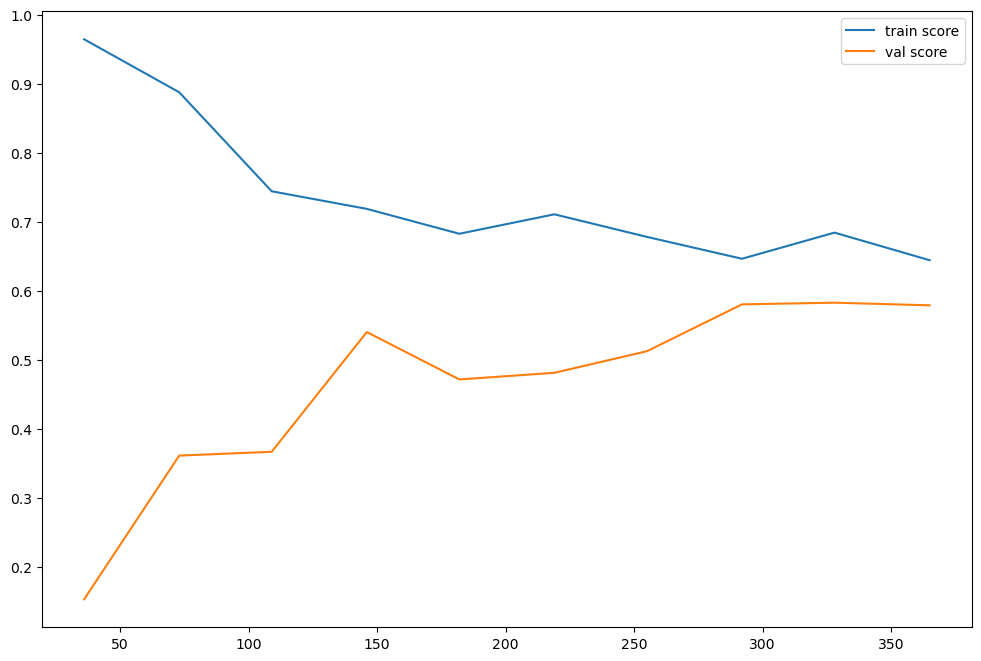

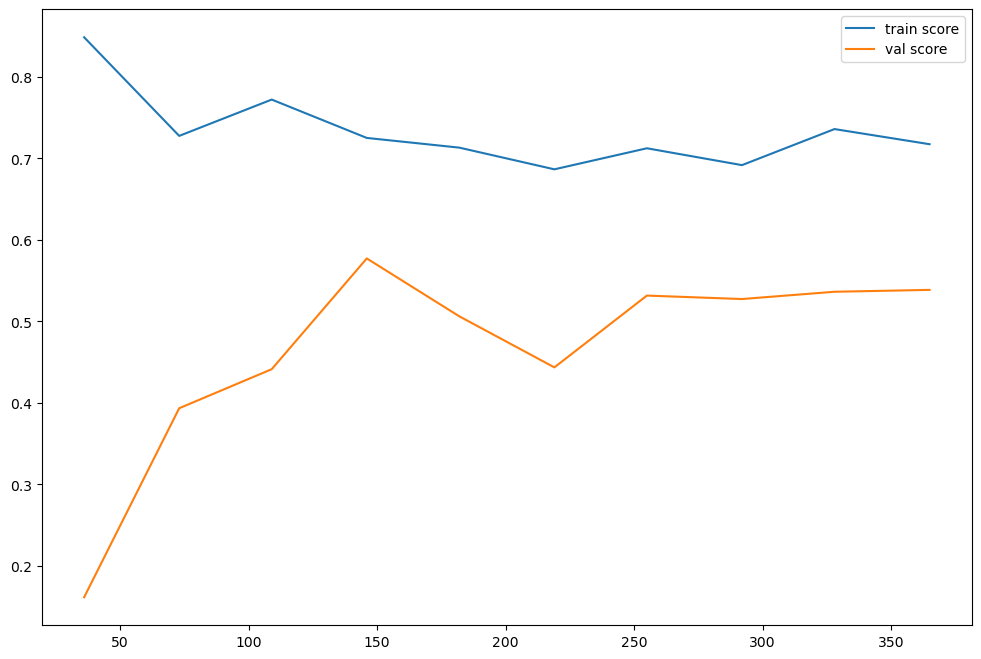

In [25]:
for model_name, model in list_of_models.items(): 
    print(model_name)
    evaluation(model)

## Optimisation

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [36]:
hyper_params = {'svc__gamma' : [1e-3, 1e-4], 
                'svc__C' : [1, 10, 100, 1000],
                'pipeline__polynomialfeatures__degree' : [2, 3, 4],
                'pipeline__selectkbest__k' : range(40, 60)
               } # ces hyperparamètres ne sont que pour le modèle SVC

In [37]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring = 'recall', cv = 4, n_iter = 40)

grid.fit(X_train, y_train)

print(grid.best_params_) # afficher les meilleurs hyperparamètres

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 55, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



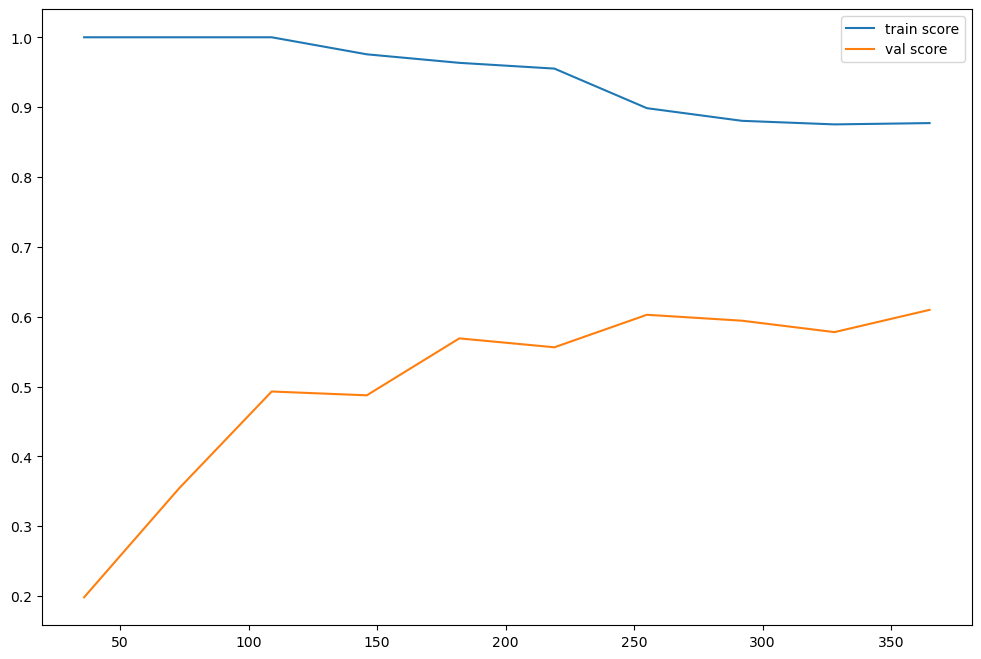

In [38]:
evaluation(grid.best_estimator_)

### Precision Recall Curve

In [39]:
from sklearn.metrics import precision_recall_curve

In [40]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

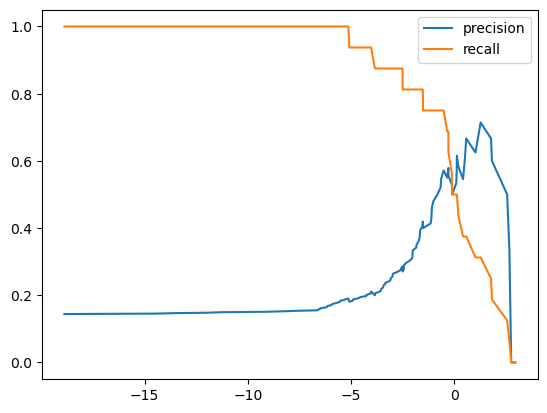

In [41]:
plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.legend()

In [42]:
def model_final(model, X, threshold = 0):
    return (model.decision_function(X) > threshold)
        

In [43]:
y_pred = model_final(grid.best_estimator_, X_test, threshold = -1)

In [45]:
from sklearn.metrics import recall_score

In [44]:
f1_score(y_test, y_pred)

0.6

In [46]:
recall_score(y_test, y_pred)

0.75